In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import re

In [3]:
#data = pd.read_csv("C:\\Users\\my pc\\Downloads\\Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv")
data = pd.read_csv("C:\\Users\\my pc\\Downloads\\flipkart_data.csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [5]:
print(data.dropna(inplace=True))

None


In [6]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [7]:
#pip install scikit-learn


In [8]:
#pip install wordcloud

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#pip install nltk

In [11]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

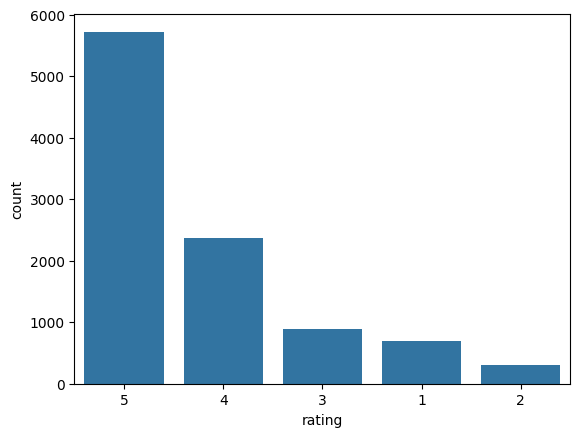

In [12]:
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index)

In [13]:
# rating label(final)

print(data['rating'])


0       5
1       5
2       4
3       5
4       5
       ..
9971    5
9972    5
9973    5
9974    5
9975    5
Name: rating, Length: 9976, dtype: int64


In [14]:
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 4:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['Class_label'] = pos_neg
print(data)
print(pos_neg)

                                                 review  rating  Class_label
0     It was nice produt. I like it's design a lot. ...       5            1
1     awesome sound....very pretty to see this nd th...       5            1
2     awesome sound quality. pros 7-8 hrs of battery...       4            1
3     I think it is such a good product not only as ...       5            1
4     awesome bass sound quality very good bettary l...       5            1
...                                                 ...     ...          ...
9971                                      GoodREAD MORE       5            1
9972  Everything is amazimg but the built is very li...       5            1
9973                                      GoodREAD MORE       5            1
9974       Best headphone i have ever used....READ MORE       5            1
9975                                      NiceREAD MORE       5            1

[9976 rows x 3 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [15]:
data['Class_label'].value_counts()

Class_label
1    8091
0    1885
Name: count, dtype: int64

In [16]:
stp_words=stopwords.words('english')
def clean_review(x): 
  cleanreview=" ".join(word for word in x.
                       split() if word not in stp_words)
  return cleanreview 

data['Review']=data['review'].apply(clean_review)
print(data)

                                                 review  rating  Class_label  \
0     It was nice produt. I like it's design a lot. ...       5            1   
1     awesome sound....very pretty to see this nd th...       5            1   
2     awesome sound quality. pros 7-8 hrs of battery...       4            1   
3     I think it is such a good product not only as ...       5            1   
4     awesome bass sound quality very good bettary l...       5            1   
...                                                 ...     ...          ...   
9971                                      GoodREAD MORE       5            1   
9972  Everything is amazimg but the built is very li...       5            1   
9973                                      GoodREAD MORE       5            1   
9974       Best headphone i have ever used....READ MORE       5            1   
9975                                      NiceREAD MORE       5            1   

                                       

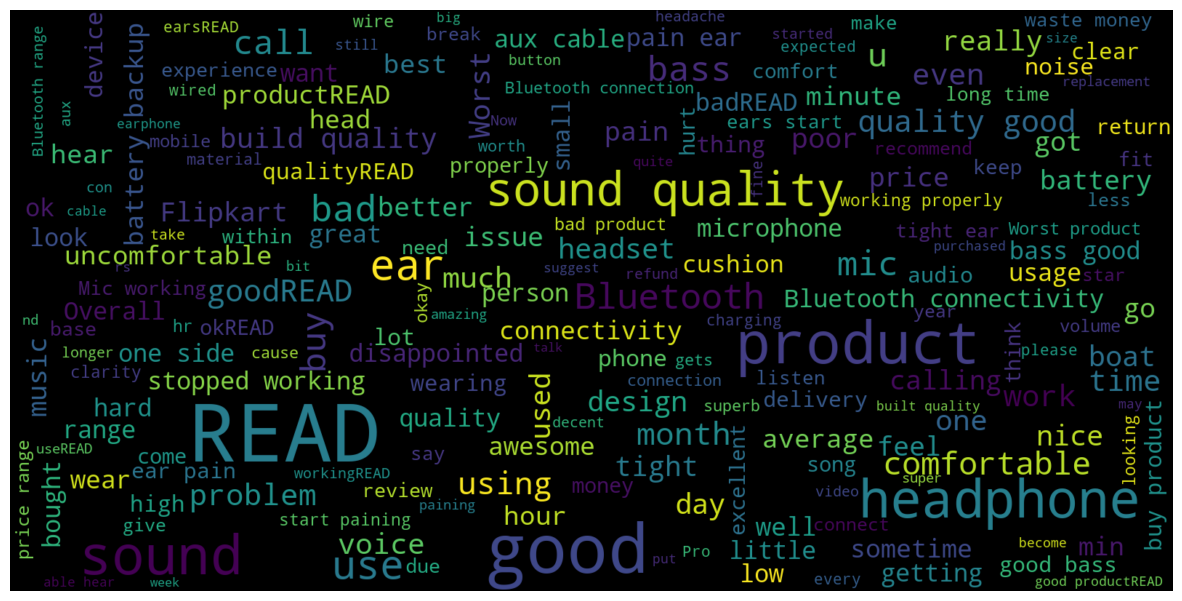

In [17]:
consolidated=' '.join(word for word in data['Review'][data['Class_label']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()
print(X.shape)
print(X)

(9976, 2500)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Class_label'],
                                                test_size=0.10 ,
                                                random_state=42)

In [20]:
print(x_train.shape)

(8978, 2500)


In [21]:
print(y_train.shape)

(8978,)


In [22]:
print(x_test.shape)

(998, 2500)


In [23]:
print(y_test)

5825    1
5171    1
6041    1
107     1
3422    0
       ..
9191    1
4412    1
3445    0
4731    1
8822    1
Name: Class_label, Length: 998, dtype: int64


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

# This code is modified by Susobhan Akhu

0.8957915831663327


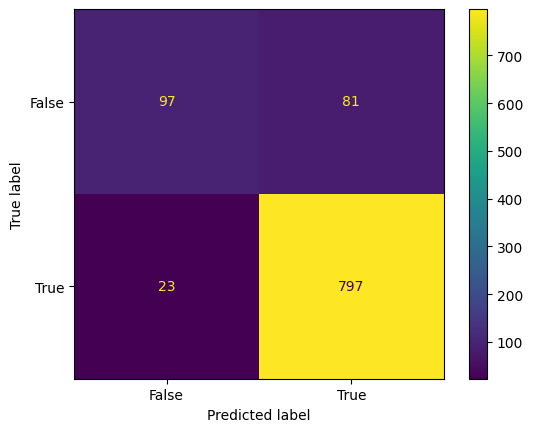

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65       178
           1       0.91      0.97      0.94       820

    accuracy                           0.90       998
   macro avg       0.86      0.76      0.79       998
weighted avg       0.89      0.90      0.89       998



In [27]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

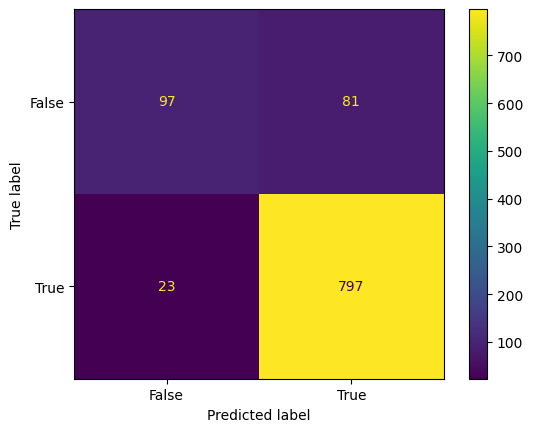

In [28]:
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65       178
           1       0.91      0.97      0.94       820

    accuracy                           0.90       998
   macro avg       0.86      0.76      0.79       998
weighted avg       0.89      0.90      0.89       998



In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
pred = clf.predict(x_test)

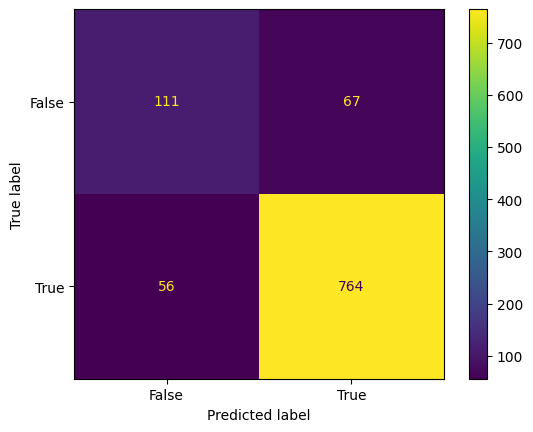

In [31]:
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       178
           1       0.92      0.93      0.93       820

    accuracy                           0.88       998
   macro avg       0.79      0.78      0.78       998
weighted avg       0.87      0.88      0.88       998



In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

pred = rf.predict(x_test)

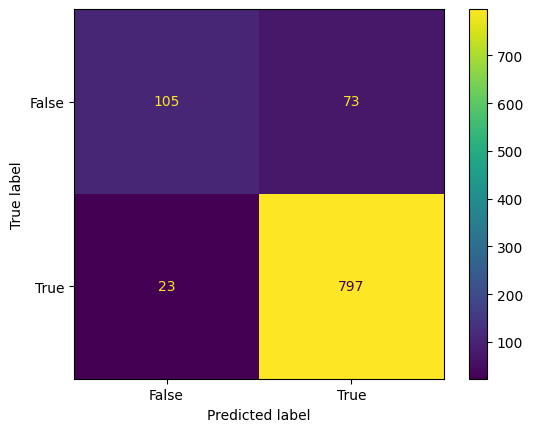

In [34]:
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       178
           1       0.92      0.97      0.94       820

    accuracy                           0.90       998
   macro avg       0.87      0.78      0.81       998
weighted avg       0.90      0.90      0.90       998



In [36]:
import tensorflow as tf
model= tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10, activation='linear')])

In [37]:
model.compile(loss = tf.keras.losses.MeanAbsoluteError,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])

In [38]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [39]:

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
history_1 = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3348 - mae: 0.3348 - val_loss: 0.1740 - val_mae: 0.1740
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1626 - mae: 0.1626 - val_loss: 0.1243 - val_mae: 0.1243
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1057 - mae: 0.1057 - val_loss: 0.1230 - val_mae: 0.1230
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0851 - mae: 0.0851 - val_loss: 0.1179 - val_mae: 0.1179
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0759 - mae: 0.0759 - val_loss: 0.1206 - val_mae: 0.1206
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0702 - mae: 0.0702 - val_loss: 0.1097 - val_mae: 0.1097
Epoch 7/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0656 - mae: 0.0656 - val_loss: 0.1121 - val_mae: 0.1121
Epoch 8/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0627 - mae: 0.0627 - val_loss: 0.1142 - val_mae: 0.1142
Epoch 9/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [41]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_test, y_test),
)

Fit model on training data
Epoch 1/2
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0463 - mae: 0.0463 - val_loss: 0.1425 - val_mae: 0.1425
Epoch 2/2
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0426 - mae: 0.0426 - val_loss: 0.1478 - val_mae: 0.1478


In [42]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(256, activation='softmax'),
    tf.keras.layers.Dropout(0.2),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.13817740976810455


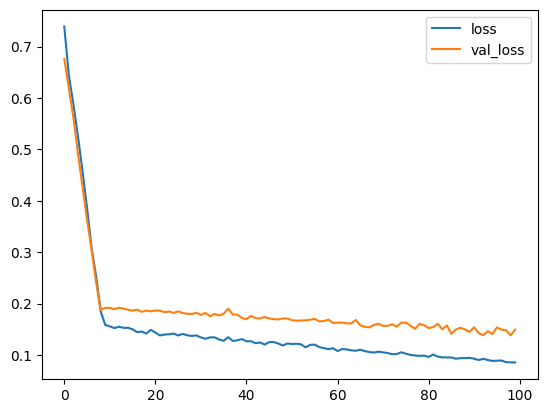

In [43]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0888 - val_loss: 0.1422
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0960 - val_loss: 0.1422
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0907 - val_loss: 0.1302
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0831 - val_loss: 0.1332
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0777 - val_loss: 0.1203
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0742 - val_loss: 0.1133
Epoch 7/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0688 - val_loss: 0.1062
Epoch 8/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0620 - val_loss: 0.1002
Epoch 9/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0570 - val_loss: 0.0998
Epoch 10/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0534 - val_loss: 0.0983
Epoch 11/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0520 - val_loss: 0.1060
Epoch 12/100
281/281 ━━━━━━━━